<a href="https://colab.research.google.com/github/amirmohammadkalateh/overfitting/blob/main/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Summary with Dropout:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8564 - loss: 0.4749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9640 - loss: 0.1192
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9767 - loss: 0.0800
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9816 - loss: 0.0579
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9841 - loss: 0.0481
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9875 - loss: 0.0382
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9884 - loss: 0.0359
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9899 - loss: 0.0295
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9907 - loss: 0.0280
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9916 - loss: 0.0233
Test Loss: 0.0767, Test Accuracy: 0.9800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_6']
Received: inputs=Tensor(shape=(1, 784))
  warnings.warn(msg)


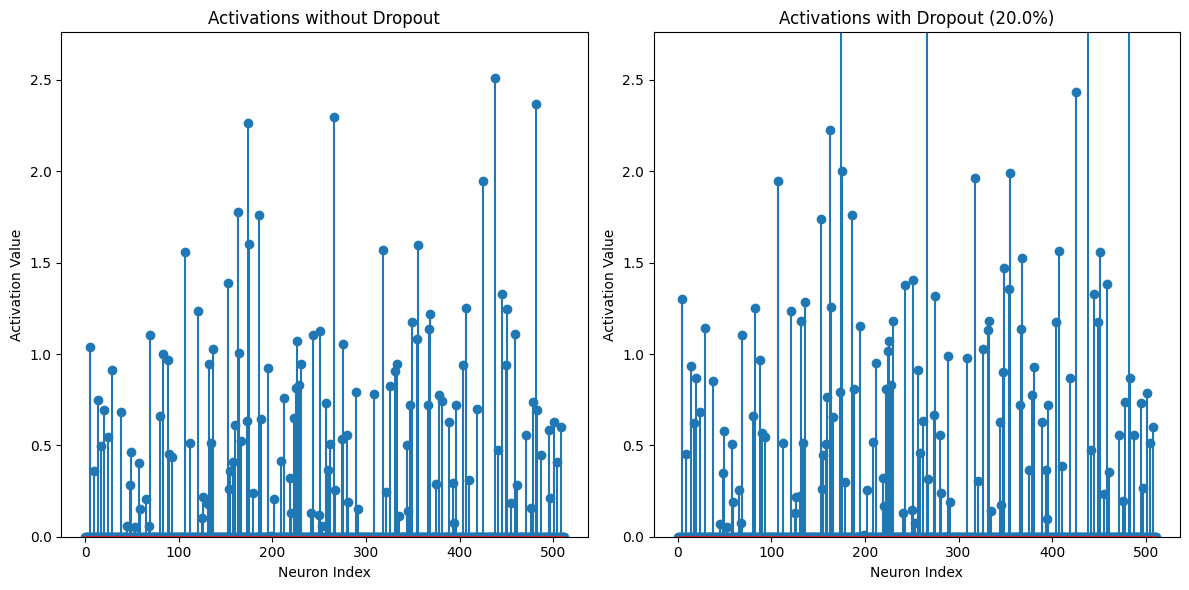

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# 1. Define the ANN Model with Dropout
def create_model_with_dropout(input_shape, dropout_rate=0.2):
    """
    Creates an ANN model with dropout layers.

    Args:
        input_shape: The shape of the input data (e.g., (784,) for MNIST).
        dropout_rate: The dropout rate (probability of dropping a neuron).

    Returns:
        A Keras Sequential model.
    """
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=input_shape, name='dense_1'),
        keras.layers.Dropout(dropout_rate, name='dropout_1'),
        keras.layers.Dense(256, activation='relu', name='dense_2'),
        keras.layers.Dropout(dropout_rate, name='dropout_2'),
        keras.layers.Dense(10, activation='softmax', name='output_layer')  # 10 classes for MNIST
    ])
    return model

# 2. Load and Preprocess the Data (MNIST Example)
def load_and_preprocess_mnist():
    """
    Loads the MNIST dataset, preprocesses it, and returns the training and testing sets.

    Returns:
        A tuple containing (x_train, y_train, x_test, y_test).
    """
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten and normalize
    x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
    y_train = keras.utils.to_categorical(y_train, num_classes=10)  # One-hot encode
    y_test = keras.utils.to_categorical(y_test, num_classes=10)
    return x_train, y_train, x_test, y_test

# 3. Visualize Dropout (Simulated)
def visualize_dropout(model, sample_input, layer_name='dropout_1'):
    """
    Visualizes the effect of dropout on a single sample.  This is a *simulation*
    because we can't directly see which neurons are dropped during a *forward pass*
    in Keras's training.  This function samples *a single* dropout mask and applies
    it to the activations of a layer.

    Args:
        model: The Keras model.
        sample_input: A single input sample (e.g., a flattened MNIST image).
        layer_name: The name of the dropout layer to visualize.  Defaults to 'dropout_1'.
    """
    # Get the dropout layer
    dropout_layer = model.get_layer(layer_name)
    if not isinstance(dropout_layer, keras.layers.Dropout):
        raise ValueError(f"Layer '{layer_name}' is not a Dropout layer.")

    # Get the input to the dropout layer
    intermediate_model = keras.Model(inputs=model.inputs, outputs=model.get_layer('dense_1').output)
    intermediate_output = intermediate_model.predict(np.expand_dims(sample_input, axis=0))

    # Generate a *sample* dropout mask (for visualization purposes)
    dropout_rate = dropout_layer.rate
    num_neurons = intermediate_output.shape[1]
    mask = np.random.binomial(n=1, p=1 - dropout_rate, size=num_neurons)
    mask = mask.astype(bool)

    # Apply the mask to the activations
    output_with_dropout = intermediate_output.copy()
    output_with_dropout[0, mask] = output_with_dropout[0, mask] * (1.0 / (1 - dropout_rate))

    # Visualize the effect
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.stem(intermediate_output[0])
    plt.title("Activations without Dropout")
    plt.xlabel("Neuron Index")
    plt.ylabel("Activation Value")
    plt.ylim(0, np.max(intermediate_output) * 1.1)

    plt.subplot(1, 2, 2)
    plt.stem(output_with_dropout[0])
    plt.title(f"Activations with Dropout ({dropout_rate * 100}%)")
    plt.xlabel("Neuron Index")
    plt.ylabel("Activation Value")
    plt.ylim(0, np.max(intermediate_output) * 1.1)
    plt.tight_layout()
    plt.show()

# 4. Train and Evaluate the Model
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=128):
    """
    Trains and evaluates the given model.

    Args:
        model: The Keras model to train.
        x_train, y_train, x_test, y_test: The training and testing data.
        epochs: The number of training epochs.
        batch_size: The batch size.

    Returns:
        The trained model.
    """
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    return model

if __name__ == "__main__":
    # 1. Load and preprocess data
    x_train, y_train, x_test, y_test = load_and_preprocess_mnist()

    # 2. Create the model
    input_shape = (x_train.shape[1],)  # 784 for MNIST, needs to be a tuple
    model_with_dropout = create_model_with_dropout(input_shape, dropout_rate=0.2)
    print("Model Summary with Dropout:")
    model_with_dropout.summary()

    # 3. Train the model
    trained_model_with_dropout = train_and_evaluate_model(model_with_dropout, x_train, y_train, x_test, y_test, epochs=10)

    # 4. Visualize Dropout
    # Select a sample image for visualization (e.g., the first image in the test set)
    sample_image = x_test[0]
    visualize_dropout(trained_model_with_dropout, sample_image, layer_name='dropout_1')

